## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape,output=10,num_enurons=[512,256,128],drop=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i ,num_enuron in enumerate(num_enurons):
        if i ==0:
            x = keras.layers.Dense(units=num_enuron,
                                  activation='relu',
                                  name = 'input_layer')(input_layer)
            x = Dropout(drop)(x)
            
        else:
            x = keras.layers.Dense(units=num_enuron,
                                  activation='relu',
                                  name = 'hidden_layer'+str(i+1))(x)
            x = Dropout(drop)(x)
    
    out = keras.layers.Dense(units=output,
                            activation='softmax',
                            name = 'out_layer')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs = [out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""

lr = 0.001
BATCH_SIZE=256
EPOCHS = 50
MOMENTUM = 0.95
drop_EXP = [0.15,0.2,0.25] 

In [9]:
from keras.layers import Dropout
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for drop in drop_EXP:
    keras.backend.clear_session()
    print('drop = ',drop)
    model = build_mlp(x_train.shape[1:],drop=drop)
    model.summary()
    
    opt = keras.optimizers.adam(lr=lr)
    model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer = opt)
    
    model.fit(x_train,y_train,
             batch_size = BATCH_SIZE,
             epochs = EPOCHS,
             validation_data = (x_test,y_test),
             shuffle=True)
    
    loss= model.history.history['loss']
    val_loss =  model.history.history['val_loss']
    acc =  model.history.history['acc']
    val_acc =  model.history.history['val_acc']
    
    results['drop = '+str(drop)]= {
        'loss' :loss,
        'val_loss':val_loss,
        'acc':acc,
        'val_acc':val_acc
    }

drop =  0.15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
input_layer (Dense)          (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0       

Epoch 50/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2847 - acc: 0.5385 - val_loss: 1.3565 - val_acc: 0.5208
drop =  0.2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
input_layer (Dense)          (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               328

50000/50000 [==============================] - 3s 68us/step - loss: 1.3813 - acc: 0.5020 - val_loss: 1.3863 - val_acc: 0.5042
Epoch 49/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.3875 - acc: 0.5012 - val_loss: 1.3838 - val_acc: 0.5074
Epoch 50/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.3858 - acc: 0.5010 - val_loss: 1.3952 - val_acc: 0.5038
drop =  0.25
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
input_layer (Dense)          (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               13

Epoch 47/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4947 - acc: 0.4648 - val_loss: 1.4657 - val_acc: 0.4827
Epoch 48/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4901 - acc: 0.4645 - val_loss: 1.4513 - val_acc: 0.4868
Epoch 49/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.4926 - acc: 0.4627 - val_loss: 1.4478 - val_acc: 0.4897
Epoch 50/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4873 - acc: 0.4669 - val_loss: 1.4378 - val_acc: 0.4889


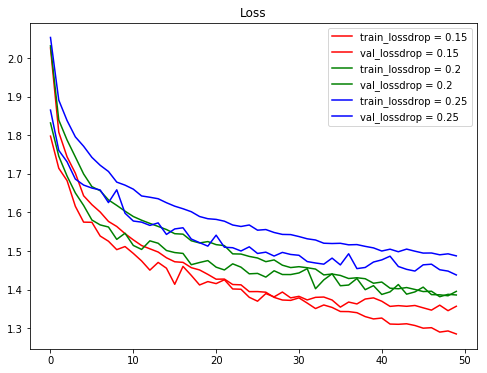

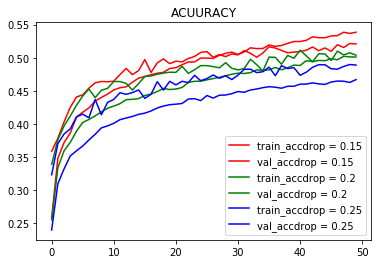

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color = ['r','g','b']
plt.figure(figsize=(8,6))

for i,key in enumerate(results.keys()):
    plt.plot(range(len(results[key]['loss'])),results[key]['loss'],label = "train_loss" + key,color=color[i])
    plt.plot(range(len(results[key]['val_loss'])),results[key]['val_loss'],label = "val_loss" + key,color=color[i])
plt.legend()
plt.title("Loss")
plt.show()

for i,key in enumerate(results.keys()):
    plt.plot(range(len(results[key]['acc'])),results[key]['acc'],label = "train_acc" + key,color=color[i])
    plt.plot(range(len(results[key]['val_acc'])),results[key]['val_acc'],label = "val_acc" + key,color=color[i])
plt.legend()
plt.title("ACUURACY")
plt.show()